<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Random Variables</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.2</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab exercise we will recap some important notations from probability theory, like
- the probability mass function of a binomial distribution
- the probability density function of a univariate and bivariate normal distribution
- the marginal and conditional probability density functions
- the cumulative distribution function
- skewness and kurtosis of a distribution
- central limit theorem
- correlation coefficient
- Mahalanobis distance
- likelihood function

This lab exercise is used only to create the figures for the book.

### Table of contents
1. [Bernoulli and binomial distributions](#Binomial)
2. [Univariate and bivariate normal distributions](#Normal)
3. [Skewness and kurtosis](#SkewKurt)
4. [Central Limit Theorem](#CLT)
5. [Correlation coefficient](#Correlation)
6. [Mahalanobis distance](#Mahalanobis)
7. [Likelihood](#Likelihood)

## 1. Bernoulli and binomial distributions <a name="Binomial"></a>

Before starting our journey into the different concepts related to probability theory, let's import the required libraries.

In [1]:
from scipy.stats import norm, beta, t, cosine, binom, pearsonr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

A discrete random variable can have only discrete values. The most intuitive example of a random variable with Bernoulli distribution is a single tossing of a coin with only two possible outcomes: either "head" or "tail". Denoting $p$ the probability of obtaining "head" in a coin flip, we can state that the coin is either fair ($p=0.5$) or biased ($p\neq 0.5$).

Now, if we flip consecutively this coin $N$ times then we have a binomial distribution. In the following figure, the probability mass function of a $N$ coin flips is given. The function provides the probability that $k$ outcomes of $N=100$ coin flips will be "head" (with the assumption that "head" represents 1 and "tail" 0).

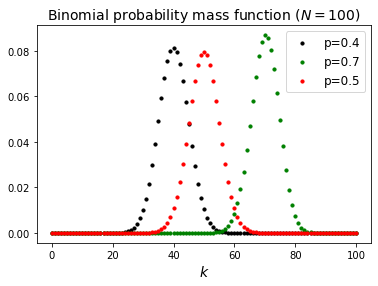

In [2]:
N=100
p1=0.5
p2=0.4
p3=0.7
k=np.linspace(0,100,101)
plt.scatter(k,binom.pmf(k, N, p2),s=10,c='k',label='p=0.4')
plt.scatter(k,binom.pmf(k, N, p3),s=10,c='g',label='p=0.7')
plt.scatter(k,binom.pmf(k, N, p1),s=10,c='r',label='p=0.5')
plt.legend(fontsize=12)
plt.xlabel('$k$',fontsize=14)
plt.title('Binomial probability mass function ($N=100$)',fontsize=14)
plt.show()

In case of a fair coin ($p=0.5$) we obtain the highest probability for $k=50$ when tossing the coin $N=100$ times. For a biased coin this is different. With bias toward "tail" ($p=0.4$) the highest probability is obtained for $k=40$ "heads" and with bias toward "head" ($p=0.7$) the highest probability is obtained for $k=70$ "heads" when tossing the coin $N=100$ times.

## 2. Univariate and bivariate normal distributions <a name="Normal"></a>

A continuous random variable can have any real value. The most common distribution is the normal distribution with a bell-shaped curve.

To make the plot of the probability density function of a univariate and bivariate normal distribution, we should create a (mesh)grid for the two random variables with the normal distribution.

In [3]:
x = np.linspace(norm.ppf(0.0002),norm.ppf(0.9998), 100)
y = np.linspace(norm.ppf(0.0002),norm.ppf(0.9998), 100)
X, Y = np.meshgrid(x,y)

Then we can create the 2D plot for the univariate normal distribution and 3D plot for the bivariate normal distribution.

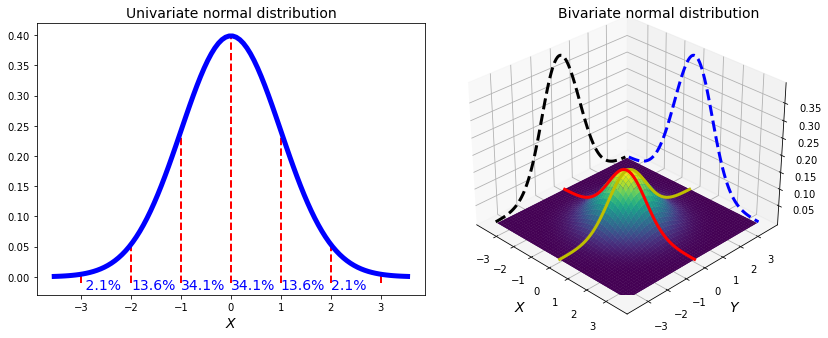

In [4]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.01)

# Create 2D plot
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, norm.pdf(x),'b-', lw=5)
xtick=np.linspace(-3,3,7)
ymin=-0.01
ymax=norm.pdf(xtick)
ax1.vlines(xtick, ymin, ymax, colors='r', linestyles='dashed',lw=2)
ax1.text(-3,-0.02,' %2.1f'%(100*(norm.cdf(-2)-norm.cdf(-3)))+'%',fontsize=14,color='b')
ax1.text(-2,-0.02,'%2.1f'%(100*(norm.cdf(-1)-norm.cdf(-2)))+'%',fontsize=14,color='b')
ax1.text(-1,-0.02,'%2.1f'%(100*(norm.cdf(0)-norm.cdf(-1)))+'%',fontsize=14,color='b')
ax1.text(0,-0.02,'%2.1f'%(100*(norm.cdf(1)-norm.cdf(0)))+'%',fontsize=14,color='b')
ax1.text(1,-0.02,'%2.1f'%(100*(norm.cdf(2)-norm.cdf(1)))+'%',fontsize=14,color='b')
ax1.text(2,-0.02,'%2.1f'%(100*(norm.cdf(3)-norm.cdf(2)))+'%',fontsize=14,color='b')
ax1.set_xlabel('$X$',fontsize=14)
ax1.set_title('Univariate normal distribution',fontsize=14)

# Create 3D plot
ax2 = fig.add_subplot(1,2,2,projection='3d')
mu=[0,0]
Sigma=[[1,0],[0,1]]
mv=multivariate_normal(mu, Sigma)
Z=mv.pdf(np.dstack((X, Y)))
ax2.plot_surface(X, Y, Z,cmap='viridis',zorder=10)
# Add conditional pdf curves
ax2.plot(0*np.ones(len(x)), y,Z[50,:],'y-', lw=3, zorder=5)
ax2.plot(x,0*np.ones(len(y)), Z[:,50],'r-', lw=3, zorder=5)
# Add marginal pdf curves
ax2.plot(x,y.max()*np.ones(len(y))+0.1,norm.pdf(x),'b--', lw=3,zorder=1)
ax2.plot(x.min()*np.ones(len(x))-0.1,y,norm.pdf(y),'k--', lw=3, zorder=1)
ax2.set_xlabel('$X$',fontsize=14)
ax2.set_ylabel('$Y$',fontsize=14)
ax2.set_title('Bivariate normal distribution',fontsize=14,loc='right')
ax2.view_init(elev=30, azim=-45)
ax2.plot_surface(X, Y, Z,cmap='viridis',linewidth=0,zorder=10)
ax2.dist = 8
plt.show()

The probability density function (PDF) of the univariate normal distribution with zero mean ($\mu=0$) and unit standard deviation ($\sigma=1$) is shown on the left of the figure above where each band has a width of 1 standard deviation. The 68-95-99.7 rule, also known as the empirical rule, is a shorthand used to remember the percentage of values that lie within a band around the mean in a normal distribution with a width of two ($\pm\sigma$), four ($\pm2\sigma$) and six ($\pm3\sigma$) standard deviations. More accurately, 68.27\%, 95.45\% and 99.73\% of the values lie within one, two and three standard deviations of the mean, respectively.

With the random variables $X$ and $Y$ having normal distributions then we can define the multivariate (bivariate) normal distribution (or joint distribution) as a generalization of the one-dimensional (univariate) normal distribution to higher dimensions. This can be seen on the right of the above figure. The bell shape curves along the surface represent the conditional probability distributions of $Y$ when $X=0$ (yellow), respective of $X$ when $Y=0$ (red), while the dashed bell curves on the "walls" represent the marginal probabilities of $X$ (blue), respective $Y$ (black)).

The cumulative distribution function (CDF) of a real-valued random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. The CDF of a normal distribution with $\mu=0$ and $\sigma=1$ is shown in the picture below:

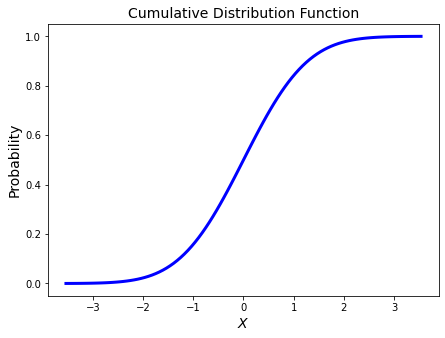

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(x, norm.cdf(x),'b-', lw=3)
plt.title("Cumulative Distribution Function",fontsize=14)
plt.xlabel('$X$',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.show()

## 3. Skewness and kurtosis <a name="SkewKurt"></a>

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be negative (the mass of the distribution is concentrated on the right of the distribution; we say it's skewed to the left), positive (the mass of the distribution is concentrated on the left of the distribution), or zero (symmetric distribution like the normal distribution).

Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable and is a descriptor of the shape of a probability distribution. A distribution with kurtosis equal to 3 is said to be mesokurtic, like the normal distribution. Then the measure $\mathbb K -3$ is known as the excess kurtosis. A distribution with positive excess kurtosis is called leptokurtic. In terms of shape, a leptokurtic distribution has fatter tails. A distribution with negative excess kurtosis is called platykurtic. In terms of shape, a platykurtic distribution has thinner tails.

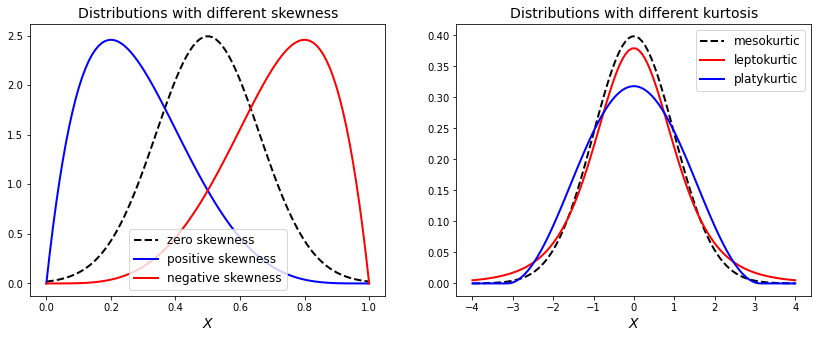

In [6]:
fig = plt.figure(figsize=(14, 5))

# Plotting disctributions with skewness
x = np.linspace(0,1, 100)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, norm.pdf(x,0.5,0.16),'k--', lw=2,label='zero skewness')
ax1.plot(x, beta.pdf(x,2,5),'b-', lw=2,label='positive skewness')
ax1.set_xlabel('$X$',fontsize=16)
ax1.plot(x, beta.pdf(x,5,2),'r-', lw=2,label='negative skewness')
ax1.set_xlabel('$X$',fontsize=14)
ax1.set_title('Distributions with different skewness',fontsize=14)
ax1.legend(loc='lower center',fontsize=12)

# Plotting disctributions with kurtosis
x = np.linspace(-4,4, 100)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, norm.pdf(x),'k--', lw=2, label="mesokurtic")
ax2.plot(x, t.pdf(x,df=5),'r-', lw=2, label='leptokurtic')
ax2.plot(x, cosine.pdf(x),'b-', lw=2,label='platykurtic')
ax2.set_xlabel('$X$',fontsize=14)
ax2.legend(fontsize=12)
ax2.set_title('Distributions with different kurtosis',fontsize=14)
plt.show()

Distributions with different skewness on the left: normal distribution with zero skewness, Beta($\alpha=2,\beta=5$) distribution with positive skewness, respective Beta($\alpha=2,\beta=5$) distribution with negative skewness. Distributions with different kurtosis on the right:  a normal distribution with zero excess kurtosis, t-distribution with 5 degrees of freedom with positive excess kurtosis, respective raised cosine distribution with negative excess kurtosis.

## 4. Central limit theorem <a name="CLT"></a>

According to the central limit theorem when a number of independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

We can visualize this by using $N$ number of coin flips. A single coin flip is Bernoulli distribution with either 0 or 1 as an outcome. Now, if we calculate the average of $N$ random coin flips and repeating this experiment many-many times the average will have a normal distribution as it can be seen in the following figure.

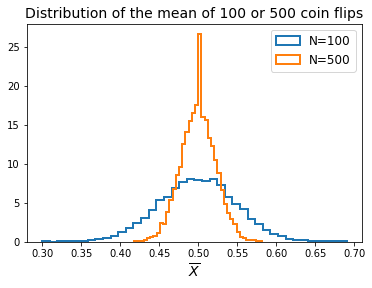

In [7]:
n=1
np.random.seed(101)
plt.hist([np.mean(np.random.binomial(n,0.5,size=100)) for i in range(10000)],bins=40,density=True,histtype='step',lw=2,\
         label='N=100')
plt.hist([np.mean(np.random.binomial(n,0.5,size=500)) for i in range(10000)],bins=40,density=True,histtype='step',lw=2,\
         label='N=500')
plt.title('Distribution of the mean of 100 or 500 coin flips',fontsize=14)
plt.xlabel('$\overline{X}$',fontsize=14)
plt.legend(fontsize=12)
plt.show()

In the above figure, we created 10000 random samples, with sample size being $N=100$ and $N=500$, each sample containing the outcome of a sequence of random coin flips. Then the average of the sample is calculated ("head" representing 1 and "tail" zero) and displayed. Although a single coin flip can be either 0 or 1, the average of many random coin flips follows a normal distribution.  We can also observe that by increasing the sample size $N$ from 100 to 500 the standard deviation of the mean of the sequence of coin flips is decreased - e.g. the orange distribution is sharper than the blue distribution.

## 5. Correlation coefficient <a name="Correlation"></a>

Pearson correlation coefficient is a measure of the linear correlation between two (random) variables $X$ and $Y$ and its value is between $-1$ and $+1$. When
- $r=-1$, then there is a perfect negative linear relationship between the two random variables
- $r=+1$, then there is a perfect positive linear relationship between the two random variables
- $r=0$, then there is no linear relation between the two random variables

We can make some examples for different correlations by using an error term with normal distribution which will be added to the perfect linear relation between two variables.

**Note:** *For calculating the correlation coefficient we can either use the formula shown in the book (see the rho function in the code below) or the pearsonr method of the scipy library.*

Correlation coefficient for top left: 0.9877664989667138
0.9877664989667136
Correlation coefficient for top right: -0.9826200038877264
-0.9826200038877263
Correlation coefficient for bottom left: 0.11302797010898097
0.113027970108981
Correlation coefficient for bottom right: 0.8140608500701723
0.8140608500701725


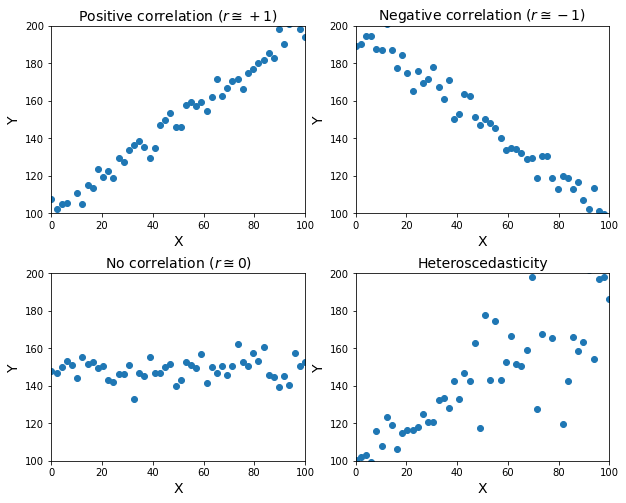

In [8]:
np.random.seed(14)
def rho(x_,y_):
    return np.sum((x_-x_.mean())*(y_-y_.mean()))/(np.sqrt(np.sum((x_-x_.mean())**2))*np.sqrt(np.sum((y_-y_.mean())**2)))

x_=np.linspace(0,100,50)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.32)

e_=np.random.normal(scale=5,size=50)
y_=100+x_+e_
ax[0,0].scatter(x_,y_)
ax[0,0].set_title('Positive correlation ($r\cong+1$)',fontsize=14)
ax[0,0].set_xlabel('X',fontsize=14)
ax[0,0].set_ylabel('Y',fontsize=14)
ax[0,0].set_xlim(0, 100)
ax[0,0].set_ylim(100, 200)
print("Correlation coefficient for top left:",pearsonr(x_,y_)[0])
print(rho(x_,y_))

e_=np.random.normal(scale=5,size=50)
y_=200-x_+e_
ax[0,1].scatter(x_,y_)
ax[0,1].set_title('Negative correlation ($r\cong-1$)',fontsize=14)
ax[0,1].set_xlabel('X',fontsize=14)
ax[0,1].set_ylabel('Y',fontsize=14)
ax[0,1].set_xlim(0, 100)
ax[0,1].set_ylim(100, 200)
print("Correlation coefficient for top right:",pearsonr(x_,y_)[0])
print(rho(x_,y_))

e_=np.random.normal(scale=5,size=50)
y_=150+e_
ax[1,0].scatter(x_,y_)
ax[1,0].set_title('No correlation ($r\cong0$)',fontsize=14)
ax[1,0].set_xlabel('X',fontsize=14)
ax[1,0].set_ylabel('Y',fontsize=14)
ax[1,0].set_xlim(0, 100)
ax[1,0].set_ylim(100, 200)
print("Correlation coefficient for bottom left:",pearsonr(x_,y_)[0])
print(rho(x_,y_))

e_=[np.random.normal(scale=std) for std in np.linspace(3,30,50)]
y_=100+x_+e_
ax[1,1].scatter(x_,y_)
ax[1,1].set_title('Heteroscedasticity',fontsize=14)
ax[1,1].set_xlabel('X',fontsize=14)
ax[1,1].set_ylabel('Y',fontsize=14)
ax[1,1].set_xlim(0, 100)
ax[1,1].set_ylim(100, 200)
print("Correlation coefficient for bottom right:",pearsonr(x_,y_)[0])
print(rho(x_,y_))
plt.show()

The plot on the right bottom is an example when the error spread is not constant and depends on the value of $X$. This is called the heteroscedasticity. The other three plots are examples of errors with constant variance, called homoscedasticity. 

## 6. Mahalanobis distance <a name="Mahalanobis"></a>

In the case of a univariate normal distribution, the distance from the mean is the so-called standard score or z-score. Looking back to the PDF of the univariate normal distribution the vertical dotted lines represent distances from the mean equal to $\pm\sigma$, $\pm2\sigma$, and $\pm3\sigma$. Similarly, we can define a distance from the mean for multivariate normal distributions. In the case of a bivariate normal distribution, these distances would represent an ellipse on the surface. This distance is called the Mahalanobis distance.

Let's make the contour plot (the ellipses on the surface of the bivariate normal distribution for which the $\{X, Y\}$ points are at equal distance from the mean $\{0,0\}$ taking into account also the correlation between the random variables.

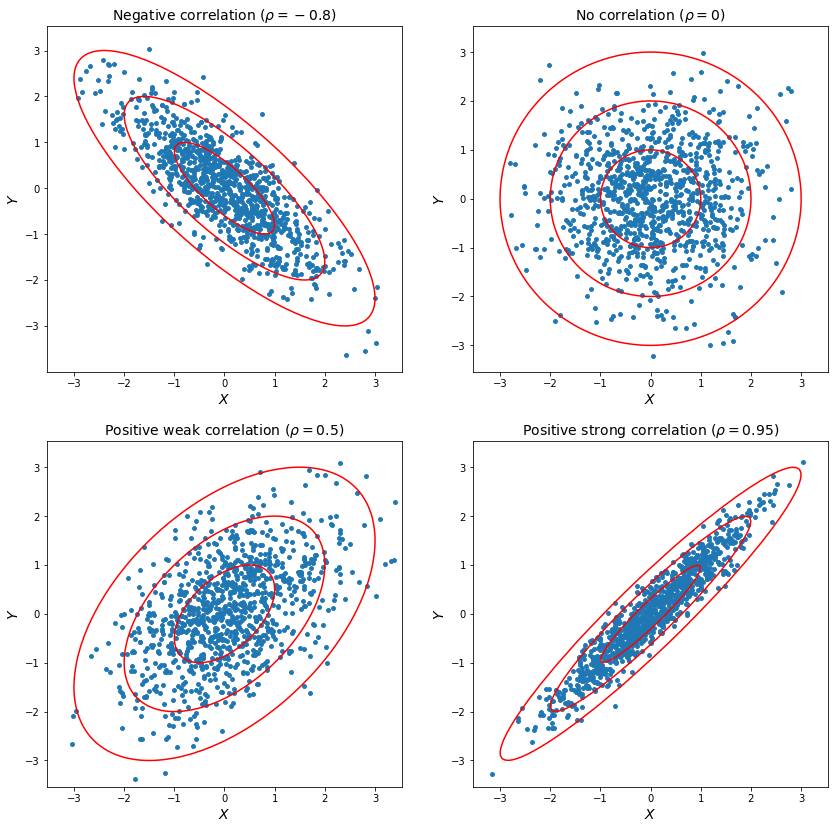

In [9]:
fig = plt.figure(figsize=(14, 14))

ro=[-0.8,0,0.5,0.95]
title={0:'Negative correlation ($\\rho=-0.8$)',
       1:'No correlation ($\\rho=0$)',
       2:'Positive weak correlation ($\\rho=0.5$)',
       3:'Positive strong correlation ($\\rho=0.95$)'}
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    mu_=np.array([0,0])
    Sigma=np.array([[1,ro[i]],[ro[i],1]])
    dM=np.sqrt(1-Sigma[0,1]**2)
    mv = multivariate_normal(mu, Sigma)
    xy=mv.rvs(1000)
    ax.scatter(xy[:,0], xy[:,1],s=15)
    Z=mv.pdf(np.dstack((X, Y)))
    levels=[mv.pdf([0,3*dM]),mv.pdf([0,2*dM]),mv.pdf([0,1*dM])]
    ax.contour(X, Y, Z,levels,colors='red')
    ax.set_ylabel('$Y$',fontsize=14)
    ax.set_xlabel('$X$',fontsize=14)
    ax.set_title(title[i],fontsize=14)    

In the above figure the scatter plot of 1000 random samples from a bivariate normal distribution with zero mean, unit variance and different correlations together with contours of standard deviations are shown (Mahalanobis distances of 1,2,3).

## 7. Likelihood <a name="Likelihood"></a>

Now, consider again that you have made $N=100$ consecutive coin flips, called a random sample, and you have to determine from this single sample having $k$ "heads" whether the coin is fair or biased. For this purpose, you plot the likelihood function and search for its maximum (the method called as the maximum likelihood estimator).

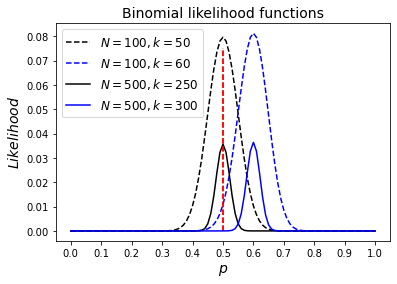

In [10]:
p=np.linspace(0,1,101)
N=100
k1=50
k2=60
plt.plot(p,binom.pmf(k1, N, p),'k--',label='$N=100,k=50$')
plt.plot([0.5,0.5],[0,0.075],'r--')
plt.plot(p,binom.pmf(k2, N, p),'b--',label='$N=100,k=60$')
N=500
k1=250
k2=300
plt.plot(p,binom.pmf(k1, N, p),'k',label='$N=500,k=250$')
plt.plot([0.5,0.5],[0,0.075],'r--')
plt.plot(p,binom.pmf(k2, N, p),'b',label='$N=500,k=300$')
plt.title('Binomial likelihood functions',fontsize=14)
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('$p$',fontsize=14)
plt.ylabel('$Likelihood$',fontsize=14)
plt.legend(fontsize=12)
plt.show()

As can be observed from the figure, there are two data (two random samples with size $N=100$): in one data there are $k=50$ "heads" while in the other there are $k=60$ "heads" out of $N=100$ coin flips. Looking at the likelihood function for $k=50$, the maximum value is obtained for the probability of $p=0.5$, so we can conclude that the coin is fair. Similarly, the maximum of the likelihood function for $k=60$ is at $p=0.6$, thus we might conclude that the coin is biased toward the "head". It should be noted, however, that the likelihood functions are overlapping (black and blue dashed curves), and for $k=60$ the likelihood is not zero at $p=0.5$. That means, there is still a very small chance that the coin is still fair. To eliminate that risk the sample size shall be increased to $N=500$. With the assumption that in the two outcomes the same fraction of "heads" is obtained (see the solid curves for $k=250$ and $k=300$, respectively), we can be now sure that with $k=300$ the coin is biased.

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).